In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [42]:
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# r2score
from sklearn.metrics import r2_score, classification_report

In [43]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

## Explore data

### Dataset part 1

#### Import data set

In [3]:
df = pd.read_csv('data/dataset_part_1.csv')
df.head()

,FlightNumber,Date,BoosterVersion,CostPerLaunch,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,50000000,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,50000000,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,50000000,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,50000000,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,50000000,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


Identify and calculate the percentage of missing values in each columns

In [4]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
CostPerLaunch      0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

Idendify columns dtypes

In [5]:
landing_outcomes = df['Outcome'].value_counts()

In [6]:
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

## Create a landing outcome label form outcome column

In [7]:
landing_class = [0 if x in bad_outcomes else 1 for x in df['Outcome']]

In [8]:
df['Class']=landing_class
df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


# Exploratory Data Analysis



In [10]:
profile = ProfileReport(df, title='Pandas Profiling Report')

In [11]:
profile.to_file('report/project.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

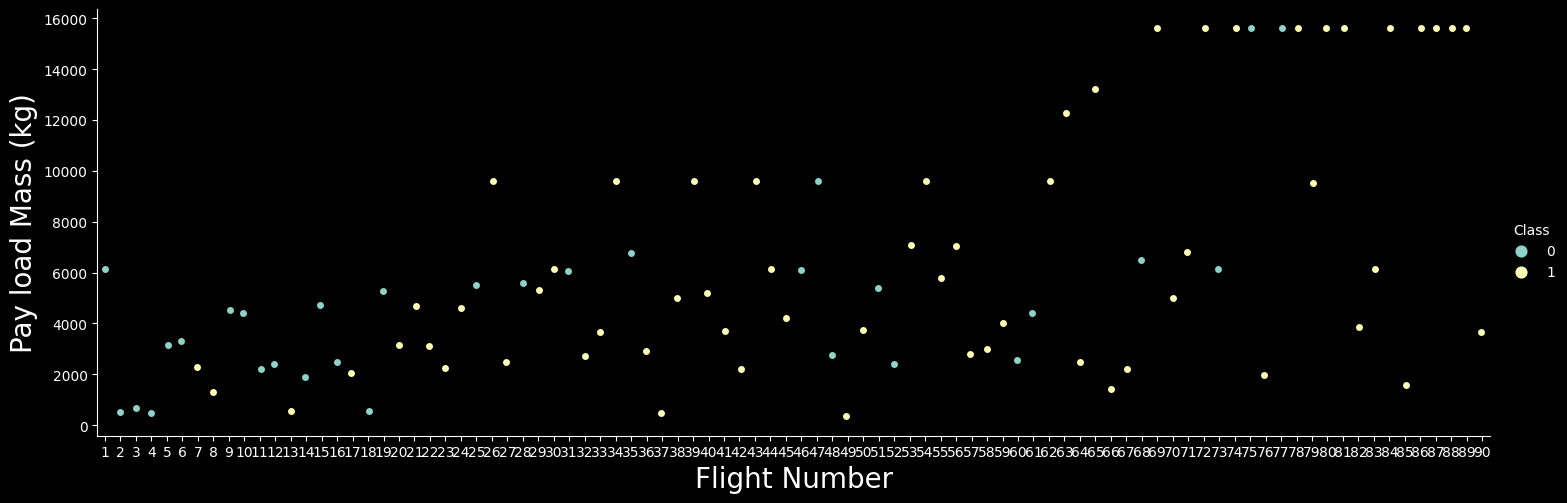

In [12]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Features  Engineering

In [18]:
features = df[['FlightNumber','CostPerLaunch', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

In [19]:
# Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features, ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,CostPerLaunch,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,50000000,6123.547647,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,50000000,525.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,50000000,677.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,50000000,500.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,50000000,3170.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
features_one_hot.astype('float64')

,FlightNumber,CostPerLaunch,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,50000000.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,50000000.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,50000000.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,50000000.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,50000000.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,50000000.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,50000000.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,50000000.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,50000000.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# function to plot confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [25]:
X = features_one_hot
Y = df['Class'].to_numpy()

In [26]:
X.head()

,FlightNumber,CostPerLaunch,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,50000000,6123.547647,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,50000000,525.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,50000000,677.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,50000000,500.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,50000000,3170.000000,1,False,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
# Feature scaling
scale = preprocessing.StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [36]:
parameters ={'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']} 
LR = LogisticRegression(C=0.1, solver='lbfgs')
LR.fit(X_train_stand, y_train)
y_hat = LR.predict(X_test)
r2_score(y_test, y_hat)

-0.5

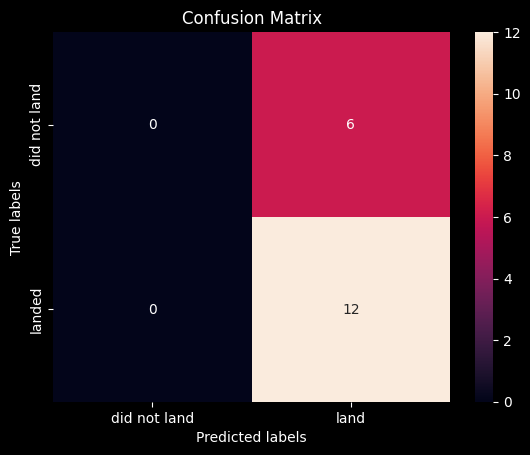

In [37]:
plot_confusion_matrix(y_test, y_hat)

In [44]:
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      1.00      0.80        12

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

